##### An example of using foresee from jupyter notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import pandas as pd
import numpy as np

In [3]:
# import local modules

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+'\\scripts')

import main
import utils

please note, input dataframe most be in the following format otherwise it won't be processed properly.

1) If providing more than one time series, then you need to provide an unique id for each time series as a column in input dataframe with name 'id'.

2) If providing date-time column then it should be named 'date_stamp'.

3) Time series values column name should be 'y'.


In [5]:
# sample time-series dataframe with columns(id, date_stamp, y)

ts_df = utils.read_csv('test_data_light.csv')
ts_df['date_stamp'] = pd.to_datetime(ts_df['date_stamp'])
ts_df.head()

,id,date_stamp,y
0,1,2018-01-02,67.599998
1,1,2018-01-03,69.320000
2,1,2018-01-04,68.800003
3,1,2018-01-05,69.900002
4,1,2018-01-08,70.050003


In [6]:
# user defind parameters
# not all in use currently

gbkey = 'id'
ds_column = 'date_stamp'
freq = 5
fcst_length = 10
model_list = ['ewm_model', 'fft', 'holt_winters', 'prophet', 'sarimax']

'''
avilable run types: 'best_model', 'all_best', 'all_models'
'''

run_type = 'all_best'
holdout_length = 20

In [7]:
'''
result:  dataframe containing fitted values and future forecasts
fit_results_list:  list of dictionaries containing fitted values, forecasts, and errors (useful for debuging)
'''

result, fit_result_list = main.collect_result(
                                                    ts_df,
                                                    gbkey,
                                                    ds_column, 
                                                    freq, 
                                                    fcst_length, 
                                                    run_type, 
                                                    holdout_length, 
                                                    model_list
                                            )

result.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\abc_h\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\abc_h\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\abc_h\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\abc_h\Anaconda3\lib\s

,ewm_model_forecast,ewm_model_wfa,fft_forecast,fft_wfa,holt_winters_forecast,holt_winters_wfa,prophet_forecast,prophet_wfa,sarimax_forecast,sarimax_wfa,ts_id,best_model
0,67.599998,0.95879,69.685300,0.943044,67.651382,0.956743,71.949841,0.932802,0.000000,0.96127,1,sarimax
1,68.631999,0.95879,69.586327,0.943044,68.527245,0.956743,71.769171,0.932802,67.617369,0.96127,1,sarimax
2,68.711580,0.95879,69.478499,0.943044,70.337553,0.956743,71.795472,0.932802,69.337812,0.96127,1,sarimax
3,69.205232,0.95879,69.364784,0.943044,69.225908,0.956743,71.960305,0.932802,68.817682,0.96127,1,sarimax
4,69.529528,0.95879,69.248232,0.943044,70.344965,0.956743,71.709268,0.932802,69.917963,0.96127,1,sarimax


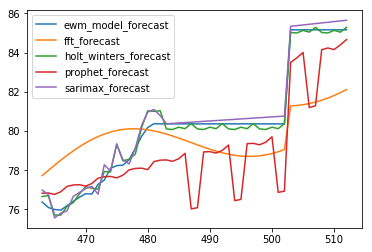

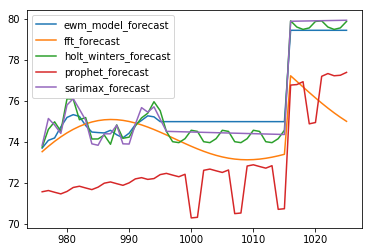

In [10]:
# m_list = model_list.remove('prophet')
for k, df in result.groupby('ts_id'):
    df.iloc[-50:].plot(y=[x+'_forecast' for x in model_list])


In [9]:
for item in fit_result_list:
    for model in model_list:
        if item[model+'_err'] is not None:
            print(model + ': ' + item[model+'_err'])